In [2]:
import glob
import pickle
import numpy as np
from multiprocessing import Pool
import requests, json
import pandas as pd
import glob
import timeit
import time
from multiprocessing import Pool
import numpy as np
def toc(start_time):
    elapsed = timeit.default_timer() - start_time
    print(elapsed)
from zipfile import ZipFile
import re
import xmlschema
from pprint import pprint
import glob
# importing element tree
import lxml.etree as etree
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st


import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams.update({'font.size': 8, 'font.style': 'normal', 'font.family':'serif'})
path_='/mnt/sdb1/sandeep/2. Occupation Networks/occupation-networks/'
import timeit


def toc(start_time):
    elapsed = timeit.default_timer() - start_time
    print(elapsed)
start_time = timeit.default_timer()
import matplotlib as mpl
import seaborn as sns
import matplotlib.cm as cm
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.transforms as mtransforms


%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.set_context('talk')#, font_scale=1.5)
mpl.rcParams.update({'text.usetex': False})
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
# path_career='/mnt/sdb1/sandeep/5. NSF vs ERC/data/'

path_codes='/mnt/sdb1/sandeep/5. NSF vs ERC/codes/'
path_data='/mnt/sdb1/sandeep/5. NSF vs ERC/data/'

my_file = open("all_country_codes.txt", "r")
all_country_codes = my_file.read()
# print(all_country_codes)

all_country_codes = all_country_codes.split("\n")[1:]
all_country_codes = [x.split(",") for x in all_country_codes]
all_country_codes.append(['South Korea','KR'])
all_country_codes.append(['Taiwan','TW'])
all_country_codes.append(['Iran','IR'])
country_to_code={x[0]:x[1] for x in all_country_codes}
code_to_country={x[1]:x[0] for x in all_country_codes}


my_file = open("eu_codes.txt", "r")
eu_codes = my_file.read()
eu_codes = eu_codes.split("\n")
eu_codes = [x.split("-") for x in eu_codes]
a=[]
for x in eu_codes:
    b=[]
    for y in x:
        b.append(y.strip())
    a.append(b)
eu_codes = [x[0:2] for x in eu_codes]
eu_codes_only=[x[1].strip() for x in eu_codes]
# eu_codes_only.append('GB')
eu_codes_only=sorted(eu_codes_only)
all_country_codes_only=[x[1].strip() for x in all_country_codes]
# print(all_country_codes)

# ERC

In [3]:

# with open(path_data+'dfs_ERC(nature physics).pkl', 'rb') as f:
#     dfs_ERC_frq=pickle.load(f)   
# with open(path_data+'dfs_ERC_frq_top20.pkl', 'rb') as f:
#     dfs_ERC_frq=pickle.load(f)   
with open(path_data+'dfs_ERC_frq_top20_with_egounis.pkl', 'rb') as f:
    dfs_ERC_frq=pickle.load(f)   



In [4]:
list_countries=dfs_ERC_frq.groupby(by='scientist')['countries'].apply(list)

countries_of_collabs=[]
for x in list_countries:
    for y in x:
        for country in y:
            if (country != -1) and (country!=None):
                countries_of_collabs.append(country)
    
import collections

counts_countries_of_collabs=collections.Counter(countries_of_collabs)
eu_codes_only
counts_countries_of_collabs
t=counts_countries_of_collabs.copy()
# counts_countries_of_collabs={k:t[k] for k in t.keys() if k not in eu_codes_only and k!='US'}
# counts_countries_of_collabs={k:t[k] for k in t.keys() if k not in eu_codes_only}

def sort_dict_by_value(d, reverse = True):
      return dict(sorted(d.items(), key = lambda x: x[1], reverse = reverse))
ccc_NON_EU_US=sort_dict_by_value(counts_countries_of_collabs)

top20=list(ccc_NON_EU_US.items())[0:20]

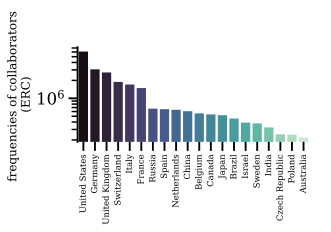

In [5]:
import seaborn as sns
x={code_to_country[k[0]]:ccc_NON_EU_US[k[0]] for k in top20}
xx=[k for k in x.keys()]

y=[x[k] for k in x.keys()]
for i in range(len(xx)):
    if xx[i] == 'Russian Federation':
        xx[i] = 'Russia'

def simpleaxis(ax,xlab_,ylab_):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.set_xlabel(xlab_,fontsize=ff) 
    ax.set_ylabel(ylab_,fontsize=ff)        
    plt.tight_layout()
    
palette=sns.color_palette("mako",len(xx))
fig = plt.figure(figsize=(5, 3));
ax_=sns.barplot(x=xx,y=y,palette=palette)

ff_smaller=8.5
def set_axis_style(ax, labels,rot_):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(0, len(labels) ))
    ax.set_xticklabels(labels,rotation=rot_,fontsize=ff_smaller)
    ax.set_xlim(-.5, len(labels) + 0.75)


# # sns.despine(offset=10, trim=True)
ff=12
# # ax.legend(loc=(.9,.65))
# xlab_='occupation pair'
xlab_=''
ylab_="frequencies of collaborators \n(ERC)"
simpleaxis(ax_,xlab_,ylab_)
ax_.spines['bottom'].set_visible(False)
ax_.set_yscale('log')
set_axis_style(ax_, xx,90)
plt.tight_layout()

# plt.savefig(path_+'results/IC2S2_fig3a.png',dpi=300, bbox_inches = "tight")
plt.savefig(path_codes+'figs/supp_fig1_counts_ERC_collab_countries.svg',dpi=300, bbox_inches = "tight")
plt.savefig(path_codes+'figs/supp_fig1_counts_ERC_collab_countries.png',dpi=300, bbox_inches = "tight")
    

saving after adding collabs with top 20 countries

In [11]:
 
        
# dfs_ERC_frq=dfs_ERC_frq.sort_values(['scientist','pub_year'],ascending=True)
# countries_temp=list(dfs_ERC_frq['countries'])

# n_identified=[len(list(filter(None, x))) for x in countries_temp]
# dfs_ERC_frq['identified_countries']=n_identified
# # dfs_NSF_frq['n_US']=[np.sum(np.array(x)=='US') for x in countries_temp]

# list_top_countries=['US','AR', 'AU', 'BR', 'CA', 'CH', 'CL', 'CN', 'CO', 'GB', 'GE', 'IL', 'IN', 'JP', 'KR', 'MX', 'NO', 'PK', 'RS', 'RU', 'SG', 'TR', 'TW', 'ZA'] 
# it=0;
# for country in list_top_countries:
#     print(it/len(list_top_countries));it+=1
#     dfs_ERC_frq['n_'+country]=[np.sum(np.array(x)==country) for x in countries_temp]      
# it=0;
# for country in eu_codes_only:
#     print(it/len(eu_codes_only));it+=1
#     dfs_ERC_frq['n_'+country]=[np.sum(np.array(x)==country) for x in countries_temp]      


In [7]:
# # dfs_ERC_frq=dfs_ERC_frq.drop(columns=['open_access','title','counts_by_year','concepts']);
# # dfs_ERC_frq=dfs_ERC_frq.drop(columns=['author_pos_','author_names_']);
# with open(path_data+'dfs_ERC_frq_top20_with_egounis.pkl', 'wb') as f:
#     pickle.dump(dfs_ERC_frq, f)

In [177]:
a=np.array([x[0] for x in top20])
a

array(['GB', 'DE', 'CH', 'CN', 'IT', 'FR', 'RU', 'CA', 'IN', 'JP', 'BR',
       'ES', 'BE', 'KR', 'AU', 'TR', 'NL', 'PL', 'CZ', 'TW'], dtype='<U2')

In [179]:
top20_NSF=list(ccc_NON_EU_US_NSF.items())[0:20]
b=np.array([x[0] for x in top20_NSF])
b

array(['CH', 'CN', 'RU', 'CA', 'IN', 'JP', 'BR', 'KR', 'AU', 'TR', 'TW',
       'IL', 'NO', 'MX', 'ZA', 'SG', 'RS', 'CL', 'PK', 'CO'], dtype='<U2')

In [183]:
# set(['CH', 'RU', 'CN', 'CA', 'JP', 'BR', 'IL', 'IN', 'AU', 'TR', 'KR',
#        'NO', 'TW', 'ZA', 'MX', 'CL', 'AR', 'RS', 'GE', 'PK'] +['CH', 'CN', 'RU', 'CA', 'IN', 'JP', 'BR', 'KR', 'AU', 'TR', 'TW',
#        'IL', 'NO', 'MX', 'ZA', 'SG', 'RS', 'CL', 'PK', 'CO','GB'])

# NSF

In [12]:
# dict_list_NSF_collab_patterns={}
# for x in range(2010,2021):
#     print(x)
#     year=str(x)
#     with open(path_data+'dict_list_NSF_collab_patterns_'+year+'(nature physics).pkl', 'rb') as f:
#         dict_list_NSF_collab_patterns[year]=pickle.load(f)   


In [9]:

# dfs_NSF_frq=pd.DataFrame()
# for x in range(2010,2021):
#     year=str(x)
#     dfs_NSF_frq=pd.concat([dfs_NSF_frq,pd.DataFrame(dict_list_NSF_collab_patterns[year])])


In [10]:
# with open(path_data+'dfs_NSF_frq(nature physics)_with_egounis.pkl', 'wb') as f:
#     pickle.dump(dfs_NSF_frq, f)

In [6]:

# # with open(path_data+'dfs_NSF_frq_top20.pkl', 'rb') as f:
# #     dfs_NSF_frq=pickle.load(f) 

with open(path_data+'dfs_NSF_frq_top20_with_egounis.pkl', 'rb') as f:
    dfs_NSF_frq=pickle.load(f) 


In [7]:
list_countries=dfs_NSF_frq.groupby(by='scientist')['countries'].apply(list)

countries_of_collabs=[]
for x in list_countries:
    for y in x:
        for country in y:
            if (country != -1) and (country!=None):
                countries_of_collabs.append(country)
    
import collections

counts_countries_of_collabs=collections.Counter(countries_of_collabs)
t=counts_countries_of_collabs.copy()
# counts_countries_of_collabs={k:t[k] for k in t.keys() if k not in eu_codes_only and k!='US'}
# counts_countries_of_collabs={k:t[k] for k in t.keys() if k!='US'}

def sort_dict_by_value(d, reverse = True):
      return dict(sorted(d.items(), key = lambda x: x[1], reverse = reverse))
ccc_NON_EU_US_NSF=sort_dict_by_value(counts_countries_of_collabs)

top20_NSF=list(ccc_NON_EU_US_NSF.items())[0:20]

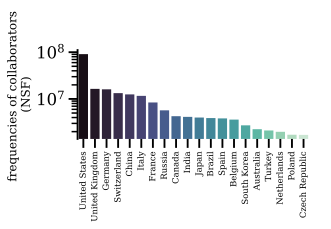

In [8]:
import seaborn as sns
x={code_to_country[k[0]]:ccc_NON_EU_US_NSF[k[0]] for k in top20_NSF}
xx=[k for k in x.keys()]

y=[x[k] for k in x.keys()]
for i in range(len(xx)):
    if xx[i] == 'Russian Federation':
        xx[i] = 'Russia'

def simpleaxis(ax,xlab_,ylab_):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.set_xlabel(xlab_,fontsize=ff) 
    ax.set_ylabel(ylab_,fontsize=ff)        
    plt.tight_layout()
    
palette=sns.color_palette("mako",len(xx))
fig = plt.figure(figsize=(5, 3));
ax_=sns.barplot(x=xx,y=y,palette=palette)

ff_smaller=8.5
def set_axis_style(ax, labels,rot_):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(0, len(labels) ))
    ax.set_xticklabels(labels,rotation=rot_,fontsize=ff_smaller)
    ax.set_xlim(-.5, len(labels) + 0.75)


# # sns.despine(offset=10, trim=True)
# ff=12
# # ax.legend(loc=(.9,.65))
# xlab_='occupation pair'
# xlab_=''
ylab_="frequencies of collaborators \n(NSF)"
simpleaxis(ax_,xlab_,ylab_)
ax_.spines['bottom'].set_visible(False)
ax_.set_yscale('log')
set_axis_style(ax_, xx,90)
plt.tight_layout()

# plt.savefig(path_+'results/IC2S2_fig3a.png',dpi=300, bbox_inches = "tight")
plt.savefig(path_codes+'figs/supp_fig1_counts_NSF_collab_countries.svg',dpi=300, bbox_inches = "tight")
plt.savefig(path_codes+'figs/supp_fig1_counts_NSF_collab_countries.png',dpi=300, bbox_inches = "tight")
    

In [7]:
 
        
# dfs_NSF_frq=dfs_NSF_frq.sort_values(['scientist','pub_year'],ascending=True)
# dfs_NSF_frq=dfs_NSF_frq[dfs_NSF_frq['scientist']!='- Robby']
# countries_temp=list(dfs_NSF_frq['countries'])

# n_identified=[len(list(filter(None, x))) for x in countries_temp]
# dfs_NSF_frq['identified_countries']=n_identified
# # dfs_NSF_frq['n_US']=[np.sum(np.array(x)=='US') for x in countries_temp]

# list_top_countries=['US','AR', 'AU', 'BR', 'CA', 'CH', 'CL', 'CN', 'CO', 'GB', 'GE', 'IL', 'IN', 'JP', 'KR', 'MX', 'NO', 'PK', 'RS', 'RU', 'SG', 'TR', 'TW', 'ZA'] 
# it=0;
# for country in list_top_countries:
#     print(it/len(list_top_countries));it+=1
#     dfs_NSF_frq['n_'+country]=[np.sum(np.array(x)==country) for x in countries_temp]        

# it=0;
# for country in eu_codes_only:
#     print(it/len(eu_codes_only));it+=1
#     dfs_NSF_frq['n_'+country]=[np.sum(np.array(x)==country) for x in countries_temp]      


In [ ]:

# with open(path_data+'dfs_NSF_frq_top20_with_egounis.pkl', 'wb') as f:
#     pickle.dump(dfs_NSF_frq, f)

# Grant date

In [9]:

with open(path_data+'df_ERC_scientist_award_details.pkl', 'rb') as f:
    df_ERC_scientist_award_details=pickle.load(f)    
df_ERC_scientist_award_details['start_date']=[x[2] for x in list(df_ERC_scientist_award_details['Duration'].apply(str.split))]
df_ERC_scientist_award_details['start_date_in_years']=[(float(x.split('-')[1])/12  +  float(x.split('-')[0])) for x in list(df_ERC_scientist_award_details['start_date'])]
df_ERC_scientist_award_details['end_date']=[x[5] for x in list(df_ERC_scientist_award_details['Duration'].apply(str.split))]
df_ERC_scientist_award_details['end_date_in_years']=[(float(x.split('-')[1])/12  +  float(x.split('-')[0])) for x in list(df_ERC_scientist_award_details['end_date'])]
df_ERC_scientist_award_details.columns=['Project', 'scientist', 'Host Institution (HI)', 'Country',       'Call Details', 'Summary', 'Summary\n  ', 'Max ERC Funding', 'Duration',       'starting_grant', 'adv_grant', 'cons_grant', 'proof_grant',       'synergy_grant', 'start_date', 'start_date_in_years', 'end_date',       'end_date_in_years']
df_ERC_scientist_award_details_not_UK=df_ERC_scientist_award_details[df_ERC_scientist_award_details['Country']!='United Kingdom']
df_ERC_scientist_award_details_not_UK=df_ERC_scientist_award_details_not_UK.sort_values(by=['scientist','start_date_in_years'])


with open(path_data+'df_NSF_grant_dates_money.pkl', 'rb') as f:
    df_NSF_grant_dates_money=pickle.load(f)   
df_NSF_grant_dates_money['start_date_in_years']=[(float(x.split('/')[0])/12 + float(x.split('/')[1])/12/30 +  float(x.split('/')[2])) for x in list(df_NSF_grant_dates_money['start_date'])]
df_NSF_grant_dates_money=df_NSF_grant_dates_money.sort_values(by=['scientist','start_date_in_years'])


In [10]:
T=df_ERC_scientist_award_details['Duration']
sci=df_ERC_scientist_award_details['scientist']
dict_sci_award_year_ERC={}
it=1;
for s,x in zip(sci,T):
    it=it+1;    print(it/len(T),end='\r');
    x_=int(x.split(',')[0].split(':')[1].lstrip().split('-')[0])
    if s in dict_sci_award_year_ERC.keys():
        if dict_sci_award_year_ERC[s]>x_:
            dict_sci_award_year_ERC[s]=x_
    else:
        dict_sci_award_year_ERC[s]=x_


In [11]:
T=df_NSF_grant_dates_money['start_date']
M=df_NSF_grant_dates_money['AwardAmount']
sci=df_NSF_grant_dates_money['scientist']
dict_sci_award_year_NSF={}
dict_sci_award_money_NSF={}
it=1
for s,x,m in zip(sci,T,M):
    it=it+1
    print(it/len(T),end='\r')
    x_=int(x.split('/')[2].lstrip())    
    if s in dict_sci_award_year_NSF.keys():
        if dict_sci_award_year_NSF[s]>x_:
            dict_sci_award_year_NSF[s]=x_
            dict_sci_award_money_NSF[s]=m
    else:
        dict_sci_award_year_NSF[s]=x_
        dict_sci_award_money_NSF[s]=m


In [12]:
df_details=df_ERC_scientist_award_details[['scientist','Country']]
dict_ERC_sci_country=df_details.set_index('scientist')['Country'].T.to_dict()
dfs_ERC_frq['location_at_award_time']=dfs_ERC_frq['scientist'].map(dict_ERC_sci_country)
dfs_ERC_frq['grant_year']=dfs_ERC_frq['scientist'].map(dict_sci_award_year_ERC)
dfs_NSF_frq['grant_year']=dfs_NSF_frq['scientist'].map(dict_sci_award_year_NSF)

# Setting career age for NSF and ERC

In [13]:
def set_career_age(df_):
    pub_date=np.array(df_['pub_year'])
    sci_=np.array(df_['scientist'])

    ind=np.where((sci_[1:-1]!=sci_[0:-2]))[0]
    ind=ind+1
    ind=np.insert(ind,0,0)
    dict_dais_to_firstpubdate={x:y for x,y in zip(sci_[ind],pub_date[ind])}

    df_['first_pub_date'] = df_['scientist'].map(dict_dais_to_firstpubdate)
    # new column------------career age at time of article 
    x =df_['pub_year'].astype('int')-df_['first_pub_date'].astype('int');
    return x
dfs_NSF_frq['career_age']=set_career_age(dfs_NSF_frq)
dfs_ERC_frq['career_age']=set_career_age(dfs_ERC_frq)


In [14]:

path_data='/mnt/sdb1/sandeep/5. NSF vs ERC/data/' 

# with open(path_data+'dict_counts_NSF.pkl', 'rb') as f:
#     dict_counts_NSF=pickle.load(f)   
# for sci in dict_counts_NSF.keys():
#     dict_counts_NSF[sci]=json.loads(dict_counts_NSF[sci])

with open(path_data+'dict_counts_ERC.pkl', 'rb') as f:
    dict_counts_ERC=pickle.load(f)   

len(dict_counts_ERC.keys())
for sci in dict_counts_ERC.keys():
    dict_counts_ERC[sci]=json.loads(dict_counts_ERC[sci])
path_career='/mnt/sdb1/sandeep/5. NSF vs ERC/data/'

with open(path_data+'dict_name_to_info_NSF.pkl', 'rb') as f:
    dict_name_to_info_NSF=pickle.load(f)     

with open(path_data+'df_NSF_grant_dates_money.pkl', 'rb') as f:
    df_NSF_grant_dates_money=pickle.load(f)      
    
with open(path_data+'dict_counts_NSF_before_award.pkl', 'rb') as f:
    dict_counts_NSF_before_award=pickle.load(f)      
    
from collections import Counter
erc_award_counts=Counter(dict_sci_award_year_ERC.values())

# create dict_counts_NSF_before_award from citation counts
# it=0
# dict_counts_NSF_before_award={}
# for sci in dict_sci_award_year_NSF.keys():
#     it=it+1
#     print(it/len(dict_sci_award_year_NSF.keys()),end='\r')
#     if sci in dict_counts_NSF.keys():
#         c_t=dict_counts_NSF[sci]
#         if c_t!=None and c_t!='NA':

#             c_t={x['year']:{'works_count':x['works_count'],'cited_by_count':x['cited_by_count']} for x in c_t['counts_by_year']}
#             citations_total=0
#             works_total=0
#             for t in c_t.keys():
#                 if dict_sci_award_year_NSF[sci]<2012:
#                     YEAR_CIT=2013
#                 else:
#                     YEAR_CIT=dict_sci_award_year_NSF[sci]
#                 if t<=YEAR_CIT:
#                     citations_total+=c_t[t]['cited_by_count']
#                     works_total+=c_t[t]['works_count']
#         dict_counts_NSF_before_award[sci]=citations_total
    



# Removing UK, Swiss and other

In [15]:
erc_all_countries=df_ERC_scientist_award_details['Country'].unique()
eu_countries=[x[0].rstrip().lstrip() for x in eu_codes]
ind_cz=np.where(np.array(eu_countries)=='Czech Republic')[0][0]
eu_countries[ind_cz]='Czechia'


countries_to_remove=set(erc_all_countries).difference(set(eu_countries))
countries_to_remove={x for x in countries_to_remove if x!='Israel'} #putting israel back in EU
countries_to_remove={x for x in countries_to_remove if x!='Norway'} #putting israel back in EU

not_UK_swiss_etc=df_ERC_scientist_award_details[~df_ERC_scientist_award_details.Country.isin(countries_to_remove)]

df_ERC_not_UK_swiss_etc=pd.DataFrame()
df_ERC_not_UK_swiss_etc['PI']=not_UK_swiss_etc['scientist']
df_ERC_not_UK_swiss_etc['']=[True for x in range(df_ERC_not_UK_swiss_etc.shape[0])]
dict_ERC_not_UK_swiss_etc=df_ERC_not_UK_swiss_etc.set_index('PI')[''].T.to_dict()

# df_ERC_scientist_award_details.groupby(['Country']).count().sort_values(by='scientist',ascending=False)

v=dfs_NSF_frq['n_US']*0
eu_codes_only.append('IL')
eu_codes_only.append('NO')
for country in eu_codes_only:
    v+=dfs_NSF_frq['n_'+country]
dfs_NSF_frq['n_EU']=v
v=dfs_ERC_frq['n_US']*0
for country in eu_codes_only:
    v+=dfs_ERC_frq['n_'+country]
dfs_ERC_frq['n_EU']=v

dfs_NSF_frq=dfs_NSF_frq[dfs_NSF_frq['grant_year']>2007]
dfs_NSF_frq['AwardAmount']=dfs_NSF_frq['scientist'].map(dict_sci_award_money_NSF)
dfs_NSF_frq['AwardAmount']=dfs_NSF_frq['AwardAmount'].astype('int')
dfs_NSF_frq['citations_before_winning']=dfs_NSF_frq['scientist'].map(dict_counts_NSF_before_award)    
# filtering to keep only papers with more than 1 author

dfs_ERC_frq['erc_winners_in_EU_definition_2023']=dfs_ERC_frq['scientist'].map(dict_ERC_not_UK_swiss_etc)
dfs_ERC_frq_NOT_UK_etc=dfs_ERC_frq[dfs_ERC_frq['erc_winners_in_EU_definition_2023']==True]
dferc=dfs_ERC_frq[dfs_ERC_frq['erc_winners_in_EU_definition_2023']==True]
dferc=dferc[dferc['identified_countries']>1]
dfnsf=dfs_NSF_frq[dfs_NSF_frq['identified_countries']>1]


dict_country_in_EU={}
for code in eu_codes_only:
    dict_country_in_EU[code]='EU'



In [275]:
# with open(path_data+'dict_counts_NSF_before_award.pkl', 'wb') as f:
#     pickle.dump(dict_counts_NSF_before_award, f)
    

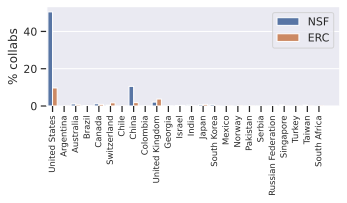

In [140]:
# ff=12
# import seaborn as sns
# df_=pd.DataFrame()
# row_=0
# df_['x']=[]
# df_['z']=[]
# for award in percent_collabs_from_country.keys():
#     it_=-1;
#     it_+=1
#     df_=pd.concat([df_, pd.DataFrame(list(percent_collabs_from_country[award].values()))])
#     rows_=pd.DataFrame(list(percent_collabs_from_country[award].values())).shape[0]
#     df_['x'].iloc[row_:row_+rows_]=list(percent_collabs_from_country[award].keys())
#     df_['z'].iloc[row_:row_+rows_]=award
#     row_=row_+rows_
# df_.columns=['country','','percentage collabs']
# sns.set(font_scale = 1.5)
# sns.set(rc={'figure.figsize':(5,2)})
# palette=sns.color_palette("mako",len(list(percent_collabs_from_country[award].values())))
# fig = plt.figure(figsize=(5, 3));
# ax_=sns.barplot(data=df_, x="country", y='percentage collabs',hue='')


# ff_smaller=8.5
# def set_axis_style(ax, labels,rot_):
#     ax.xaxis.set_tick_params(direction='out')
#     ax.xaxis.set_ticks_position('bottom')
#     ax.set_xticks(np.arange(0, len(labels) ))
#     ax.set_xticklabels(labels,rotation=rot_,fontsize=ff_smaller)
#     ax.set_xlim(-.5, len(labels) + 0.75)


# ylab_='% collabs'
# xlab_=''
# simpleaxis(ax_,xlab_,ylab_)
# ax_.spines['bottom'].set_visible(False)
# # ax_.set_yscale('log')
# xx=[code_to_country[k] for k in list_top_countries]
# set_axis_style(ax_, xx,90)
# plt.tight_layout()

# plt.savefig(path_codes+'figs/supp_fig2_%_NSF_collab_countries.svg',dpi=300, bbox_inches = "tight")
# plt.savefig(path_codes+'figs/supp_fig2_%_NSF_collab_countries.png',dpi=300, bbox_inches = "tight")
    
# # ax_=sns.barplot(x=xx,y=y,palette=palette)

# Winner's mobility analysis 

## countrywise

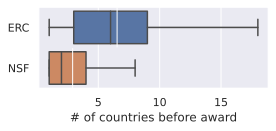

In [107]:
df_temp=dfs_NSF_frq[dfs_NSF_frq['pub_year']<=dfs_NSF_frq['grant_year']]
list_countries_winners=df_temp.groupby(by='scientist')['country_awardee'].apply(list)
list_countries_winners=[set(x) for x in list_countries_winners]
list_countries_winners_NSF=[[y for y in x if y != None] for x in list_countries_winners]

df_temp=dfs_ERC_frq_NOT_UK_etc[dfs_ERC_frq_NOT_UK_etc['pub_year']<=dfs_ERC_frq_NOT_UK_etc['grant_year']]
list_countries_winners=df_temp.groupby(by='scientist')['country_awardee'].apply(list)
list_countries_winners=[set(x) for x in list_countries_winners]
list_countries_winners_ERC=[[y for y in x if y != None] for x in list_countries_winners]

mobility_before_ERC=np.array([len(x) for x in list_countries_winners_ERC])
mobility_before_NSF=np.array([len(x) for x in list_countries_winners_NSF])

import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns

y1=mobility_before_ERC
y1=y1[~np.isnan(y1) & (y1>0)] 
y2=mobility_before_NSF
y2=y2[~np.isnan(y2) & (y2>0)]
df_=pd.DataFrame()
it_=-1;row_=0
df_['x']=[]
for data_ in [y1,y2]:
    it_+=1
    df_=pd.concat([df_, pd.DataFrame(data_)])
#         df_=df_.append()
    rows_=pd.DataFrame(data_).shape[0]
    if it_==0:
        df_['x'].iloc[row_:row_+rows_]='ERC'
    else:
        df_['x'].iloc[row_:row_+rows_]='NSF'
    row_=row_+rows_
df_.columns=['','# of countries before award']
sns.set(font_scale = 1.5)
sns.set(rc={'figure.figsize':(4,2)})
ax_=sns.boxplot(data=df_, x='# of countries before award', y='',showfliers=False ,showmeans=True,meanprops={"marker":"|","markerfacecolor":"white","markeredgecolor":"white","markersize":"40"})
plt.tight_layout()
# plt.savefig(path_codes+'figs/supp_fig3_mobility_countrywise.svg',dpi=300, bbox_inches = "tight")
# plt.savefig(path_codes+'figs/supp_fig3_mobility_countrywise.png',dpi=300, bbox_inches = "tight")


### EU considered as a single state

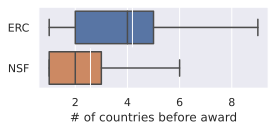

In [108]:
dict_country_in_EU={}
for code in eu_codes_only:
    dict_country_in_EU[code]='EU'

df_temp=dfs_NSF_frq[dfs_NSF_frq['pub_year']<=dfs_NSF_frq['grant_year']]
df_temp['country_awardee']=df_temp['country_awardee'].replace(dict_country_in_EU)
list_countries_winners=df_temp.groupby(by='scientist')['country_awardee'].apply(list)
list_countries_winners=[set(x) for x in list_countries_winners]
list_countries_winners_NSF=[[y for y in x if y != None] for x in list_countries_winners]

df_temp=dfs_ERC_frq_NOT_UK_etc[dfs_ERC_frq_NOT_UK_etc['pub_year']<=dfs_ERC_frq_NOT_UK_etc['grant_year']]
df_temp['country_awardee']=df_temp['country_awardee'].replace(dict_country_in_EU)
list_countries_winners=df_temp.groupby(by='scientist')['country_awardee'].apply(list)
list_countries_winners=[set(x) for x in list_countries_winners]
list_countries_winners_ERC=[[y for y in x if y != None] for x in list_countries_winners]

mobility_before_ERC=np.array([len(x) for x in list_countries_winners_ERC])
mobility_before_NSF=np.array([len(x) for x in list_countries_winners_NSF])


import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns

y1=mobility_before_ERC
y1=y1[~np.isnan(y1) & (y1>0)] 
y2=mobility_before_NSF
y2=y2[~np.isnan(y2) & (y2>0)]
df_=pd.DataFrame()
it_=-1;row_=0
df_['x']=[]
for data_ in [y1,y2]:
    it_+=1
    df_=pd.concat([df_, pd.DataFrame(data_)])
#         df_=df_.append()
    rows_=pd.DataFrame(data_).shape[0]
    if it_==0:
        df_['x'].iloc[row_:row_+rows_]='ERC'
    else:
        df_['x'].iloc[row_:row_+rows_]='NSF'
    row_=row_+rows_
df_.columns=['','# of countries before award']
sns.set(font_scale = 1.5)
sns.set(rc={'figure.figsize':(4,2)})
ax_=sns.boxplot(data=df_, x='# of countries before award', y='',showfliers=False ,showmeans=True,meanprops={"marker":"|","markerfacecolor":"white","markeredgecolor":"white","markersize":"40"})
plt.tight_layout()
plt.savefig(path_codes+'figs/supp_fig3_mobility_countrywise_EU_as_single_state.svg',dpi=300, bbox_inches = "tight")
plt.savefig(path_codes+'figs/supp_fig3_mobility_countrywise_EU_as_single_state.png',dpi=300, bbox_inches = "tight")


## universitywise

In [109]:
df_temp=dfs_NSF_frq[dfs_NSF_frq['pub_year']<=dfs_NSF_frq['grant_year']]
list_countries_winners=df_temp.groupby(by='scientist')['uni_awardee'].apply(list)
list_countries_winners=[set(x) for x in list_countries_winners]
list_countries_winners_NSF=[[y for y in x if y != None] for x in list_countries_winners]

df_temp=dfs_ERC_frq_NOT_UK_etc[dfs_ERC_frq_NOT_UK_etc['pub_year']<=dfs_ERC_frq_NOT_UK_etc['grant_year']]
list_countries_winners=df_temp.groupby(by='scientist')['uni_awardee'].apply(list)
list_countries_winners=[set(x) for x in list_countries_winners]
list_countries_winners_ERC=[[y for y in x if y != None] for x in list_countries_winners]

uni_mobility_before_ERC=np.array([len(x) for x in list_countries_winners_ERC])
uni_mobility_before_NSF=np.array([len(x) for x in list_countries_winners_NSF])

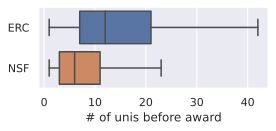

In [110]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns

y1=uni_mobility_before_ERC
y1=y1[~np.isnan(y1) & (y1>0)] 
y2=uni_mobility_before_NSF
y2=y2[~np.isnan(y2) & (y2>0)]
df_=pd.DataFrame()
it_=-1;row_=0
df_['x']=[]
for data_ in [y1,y2]:
    it_+=1
    df_=pd.concat([df_, pd.DataFrame(data_)])
#         df_=df_.append()
    rows_=pd.DataFrame(data_).shape[0]
    if it_==0:
        df_['x'].iloc[row_:row_+rows_]='ERC'
    else:
        df_['x'].iloc[row_:row_+rows_]='NSF'
    row_=row_+rows_
df_.columns=['','# of unis before award']
sns.set(font_scale = 1.5)
sns.set(rc={'figure.figsize':(4,2)})
ax_=sns.boxplot(data=df_, x='# of unis before award', y='',showfliers=False)
# ,showmeans=True,
#                 meanprops={"marker":"|",
#                        "markerfacecolor":"white", 
#                        "markeredgecolor":"white",
#                       "markersize":"40"})
# ax_.set_xticks([2,4,6,8,10,12])
plt.tight_layout()
plt.savefig(path_codes+'figs/supp_fig3_mobility_uniwise.svg',dpi=300, bbox_inches = "tight")
plt.savefig(path_codes+'figs/supp_fig3_mobility_uniwise.png',dpi=300, bbox_inches = "tight")


In [165]:

df_temp[df_temp['grant']=='ERC'].groupby(by='age_at_win').count()

,mobility,grant
age_at_win,,
1-10,1329,1329
11-20,2564,2564
21-30,839,839
31-40,410,410
41-50,130,130


In [170]:
# xt=df_temp.groupby(by='scientist').first()
# xt=xt[xt['age_at_win']<50]
# hist = xt['age_at_win'].hist(bins=100)

In [36]:
# dfs_ERC_frq['career_stage'][np.where(dfs_ERC_frq['career_age']<3)]=1

# Figures

## Panel a

In [16]:
x_missing=1

In [17]:
x=(dferc['pub_year']-dferc['grant_year'])
dferc['before_after']=5*((x>=0) &(x<5)) -5*((x>-5) &(x<0))+ 0*((x>5) &(x<-5)) 
df=dferc[dferc['team_size']-dferc['identified_countries']<=x_missing]
df['frac_US']=df['n_US']/df['identified_countries']
res_=df.groupby(['scientist','before_after']).mean()
in_erc_=[];out_erc_=[]
for sci,in_grant in res_.index:
    if sum([x in res_.loc[sci,].index for x in [-5,5]])==2:
        if in_grant==5:
            in_erc_.append(res_.loc[sci,in_grant]['frac_US'])
        elif in_grant==-5:
            out_erc_.append(res_.loc[sci,in_grant]['frac_US'])
            

In [18]:
x=(dfnsf['pub_year']-dfnsf['grant_year'])
dfnsf['before_after']=5*((x>=0) &(x<5)) -5*((x>-5) &(x<0))+ 0*((x>5) &(x<-5)) 
df=dfnsf[dfnsf['team_size']-dfnsf['identified_countries']<=x_missing]
df['frac_EU']=df['n_EU']/df['identified_countries']
res_=df.groupby(['scientist','before_after']).mean()
in_nsf_=[];out_nsf_=[]
for sci,in_grant in res_.index:
    if sum([x in res_.loc[sci,].index for x in [-5,5]])==2:
        if in_grant==5:
            in_nsf_.append(res_.loc[sci,in_grant]['frac_EU'])
        elif in_grant==-5:
            out_nsf_.append(res_.loc[sci,in_grant]['frac_EU'])

In [19]:
import seaborn as sns

def plot_before_after(in_erc,out_erc,in_nsf,out_nsf):
    import warnings
    with warnings.catch_warnings():
        warnings.simplefilter(action='ignore', category=FutureWarning)
    pd.options.mode.chained_assignment = None  # default='warn'

    dict_data={'ERC':[in_erc,out_erc],'NSF':[in_nsf,out_nsf]}
    
    df_=pd.DataFrame(); 
    df_['x']=[]
    df_['']=[]
    row_=0
    for award in dict_data.keys():
        it_=-1
        for data_ in dict_data[award]:
            it_+=1
            df_=pd.concat([df_,pd.DataFrame(data_)])
            rows_=pd.DataFrame(data_).shape[0]
            if it_==0:
                df_['x'].iloc[row_:row_+rows_]='during grant'
            else:
                df_['x'].iloc[row_:row_+rows_]='before grant'
            df_[''].iloc[row_:row_+rows_]=award

            row_=row_+rows_
    df_.columns=['x','','frac_cross']
    meanlineprops = dict(linestyle='-', linewidth=2.5, color='white')
    sns.set(rc={'figure.figsize':(4,4)})

    ax=sns.barplot(x=df_['x'],y=df_['frac_cross']*100,hue=df_[''])

    ylab_=''
    ax.set_ylabel('% US coauthors\n per ERC winner')#,fontsize=ff)
    ax.set_xlabel('')#,fontsize=ff)
    ax.set_yticks(np.array([0,4,8,12]))
    #plt.xticks(fontsize=ff)
#     trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
#     ax.text(-0.35, .95, 'c)', transform=ax.transAxes,# + trans,
#                 fontsize=label_ff, va='bottom', fontfamily='serif')
    sns.despine(offset=10, trim=True)
    return df_
 


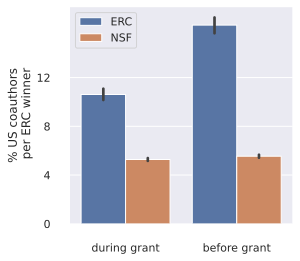

In [20]:
df_=plot_before_after(in_erc_,out_erc_,in_nsf_,out_nsf_)

with open(path_data+'fig_natphysics_a.pkl', 'wb') as f:
    pickle.dump(df_, f)    

In [21]:
temp=df_.groupby(by=['x','']).mean()
temp

frac_cross
x                           
before grant ERC    0.163020
             NSF    0.055447
during grant ERC    0.106113
             NSF    0.052785

In [22]:
print('before: ',(temp.iloc[0]-temp.iloc[1])/temp.iloc[1]*100)
print('after: ',(temp.iloc[2]-temp.iloc[3])/temp.iloc[3]*100)


before:  frac_cross    194.010042
dtype: float64
after:  frac_cross    101.027366
dtype: float64


In [23]:
print('% more US fro ERC: before vs after:', (temp.iloc[0]-temp.iloc[3])/temp.iloc[3]*100)

% more US fro ERC: before vs after: frac_cross    208.835612
dtype: float64


## Panel b

In [24]:
import numpy as np
age_bins=np.arange(1,20,1)
age_bins=[[x,x+2] for x in age_bins]


nsf=[];erc=[];nsf_var=[];erc_var=[];nsf_N=[];erc_N=[];nsf_by_sci=[];erc_by_sci=[];nsf_var_by_sci=[];erc_var_by_sci=[];
nsf_N_by_sci=[]
erc_N_by_sci=[]

x_missing=1
for it_ages in range(len(age_bins)):
#     l_=age_bins[it_ages];r_=age_bins[it_ages+1];
    l_=age_bins[it_ages][0];r_=age_bins[it_ages][1];
    print(it_ages,'----- ',l_,' to ',r_,end='\r')

    df=dfnsf[dfnsf['team_size']-dfnsf['identified_countries']<=x_missing]
    df=df[(df['career_age']<r_)&(df['career_age']>=l_)]   
    df['frac_cross']=np.divide(np.array(df['n_EU']),np.array(df['identified_countries']))
    nsf.append(np.mean(np.divide(np.array(df['n_EU']),np.array(df['identified_countries']))))
    nsf_var.append(np.var(np.divide(np.array(df['n_US']),np.array(df['identified_countries']))))
    nsf_N.append(df['n_US'].shape[0])
    nsf_by_sci.append(np.mean(df.groupby('scientist').mean()['frac_cross']))
    nsf_var_by_sci.append(np.var((df.groupby('scientist').mean()['frac_cross'])))
    nsf_N_by_sci.append(df.groupby('scientist').mean()['frac_cross'].shape[0])
    

    df=dferc[dferc['team_size']-dferc['identified_countries']<=x_missing]
    df=df[(df['career_age']<r_)&(df['career_age']>=l_)]
    df=df[df['identified_countries']>1]
    df['frac_cross']=np.divide(np.array(df['n_US']),np.array(df['identified_countries']))
    erc.append(np.mean(np.divide(np.array(df['n_US']),np.array(df['identified_countries']))))
    erc_var.append(np.var(np.divide(np.array(df['n_US']),np.array(df['identified_countries']))))
    erc_N.append(df['n_US'].shape[0])
    erc_by_sci.append(np.mean(df.groupby('scientist').mean()['frac_cross']))
    erc_var_by_sci.append(np.var((df.groupby('scientist').mean()['frac_cross'])))
    erc_N_by_sci.append(df.groupby('scientist').mean()['frac_cross'].shape[0])


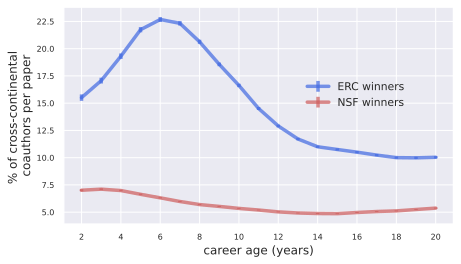

In [25]:
fig = plt.figure(0,figsize=(7, 4));
ax = fig.add_subplot(1, 1, 1);
ini_=0;alpha=.7;ff=12;lw=3.5;ms=2
xxxx=[x[0]/2+x[1]/2 for x in age_bins]
y=100*np.array(erc[ini_:]);x=xxxx[ini_:];y_err=100*np.divide(np.power(erc_var[ini_:],.5),np.power(erc_N[ini_:],0.5))
ax.errorbar(x, y, y_err , mfc='w',mec='w', ms=0, lw=lw,mew=lw,color='royalblue',ecolor='royalblue',alpha=alpha,label=r'ERC winners')
with open(path_data+'fig_natphysics_b_y_erc_vs_age.pkl', 'wb') as f:
    pickle.dump(y, f)    
with open(path_data+'fig_natphysics_b_yerr_erc_vs_age.pkl', 'wb') as f:
    pickle.dump(y_err, f)    
with open(path_data+'fig_natphysics_b_x_erc_vs_age.pkl', 'wb') as f:
    pickle.dump(x, f)    

y=100*np.array(nsf[ini_:]);x=xxxx[ini_:];y_err=100*np.divide(np.power(nsf_var[ini_:],.5),np.power(nsf_N[ini_:],0.5))
ax.errorbar(x,y,y_err , mfc='w',mec='w', ms=0,lw=lw, mew=lw,color='indianred',ecolor='indianred',alpha=alpha,label=r'NSF winners')


with open(path_data+'fig_natphysics_b_y_nsf_vs_age.pkl', 'wb') as f:
    pickle.dump(y, f)    
with open(path_data+'fig_natphysics_b_yerr_nsf_vs_age.pkl', 'wb') as f:
    pickle.dump(y_err, f)    
with open(path_data+'fig_natphysics_b_x_nsf_vs_age.pkl', 'wb') as f:
    pickle.dump(x, f)    
    
labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xlabel('career age (years)',fontsize=ff*1)
ax.set_ylabel('% of cross-continental \ncoauthors per paper',fontsize=ff*1)
ax.set_xticks(np.linspace(2,20,10))
ax.legend(bbox_to_anchor=(.6,.7),frameon=False,fontsize=ff*.9)
plt.xticks(fontsize=ff-4)
plt.yticks(fontsize=ff-4);


# simpleaxis(ax)


# mobility analysis preparation

In [27]:
# Loading

with open(path_data+'dfs_ERC_only_awardee(nature physics).pkl', 'rb') as f:
    dfs_ERC_only_awardee=pickle.load(f)  


dfs_NSF_only_awardee=pd.DataFrame()
for x in range(2010,2021):
    year=str(x)
    with open(path_data+'dict_list_NSF_collab_patterns_(only awardee details)'+year+'(nature physics).pkl', 'rb') as f:
        list_NSF_collab_patterns=pickle.load(f)   
    dfs_NSF_only_awardee=pd.concat([dfs_NSF_only_awardee,pd.DataFrame(list_NSF_collab_patterns)])

dfs_NSF_only_awardee=dfs_NSF_only_awardee.sort_values(by=['scientist','pub_year'])
dfs_ERC_only_awardee=dfs_ERC_only_awardee.sort_values(by=['scientist','pub_year'])


# missing affils and countries
print(np.sum(dfs_NSF_only_awardee['uni_awardee'].isna())/dfs_NSF_only_awardee.shape[0])
print(np.sum(dfs_ERC_only_awardee['country_awardee'].isna())/dfs_ERC_only_awardee.shape[0])

# career age and grant year
dfs_NSF_only_awardee['career_age']=set_career_age(dfs_NSF_only_awardee)
dfs_NSF_only_awardee['grant_year']=dfs_NSF_only_awardee['scientist'].map(dict_sci_award_year_NSF)
dfs_NSF_only_awardee=dfs_NSF_only_awardee[dfs_NSF_only_awardee['grant_year']>2007]

dfs_ERC_only_awardee['career_age']=set_career_age(dfs_ERC_only_awardee)
dfs_ERC_only_awardee['grant_year']=dfs_ERC_only_awardee['scientist'].map(dict_sci_award_year_ERC)

# filtering to keep only papers with more than 1 author

dfs_ERC_only_awardee['erc_winners_in_EU_definition_2023']=dfs_ERC_only_awardee['scientist'].map(dict_ERC_not_UK_swiss_etc)
dfs_ERC_only_awardee_NOT_UK_etc=dfs_ERC_only_awardee[dfs_ERC_only_awardee['erc_winners_in_EU_definition_2023']==True]

# dfs_NSF_only_awardee['AwardAmount']=dfs_NSF_only_awardee['scientist'].map(dict_sci_award_money_NSF)
# dfs_NSF_only_awardee['AwardAmount']=dfs_NSF_only_awardee['AwardAmount'].astype('int')
# dfs_NSF_only_awardee['citations_before_winning']=dfs_NSF_only_awardee['scientist'].map(dict_counts_NSF_before_award)    

# dferc=dfs_ERC_frq[dfs_ERC_frq['erc_winners_in_EU_definition_2023']==True]
# dferc=dferc[dferc['identified_countries']>1]
# dfnsf=dfs_NSF_frq[dfs_NSF_frq['identified_countries']>1]



2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
0.33635790181738884
0.34132573016433854


### fraction of EU winners with US affiliations before grant award

In [69]:
df_temp=dfs_ERC_only_awardee_NOT_UK_etc[dfs_ERC_only_awardee_NOT_UK_etc['pub_year']<dfs_ERC_only_awardee_NOT_UK_etc['grant_year']]
list_countries_winners=df_temp.groupby(by=['scientist'])['country_awardee'].apply(list)
list_countries_winners=[[y for y in x if y!=None] for x in list_countries_winners]
t=[Counter(x) for x in list_countries_winners]
ERC_been_to_US=[x for x in t if 'US' in x]
print('ERC_been_to_US=',len(ERC_been_to_US)/len(t))

df_temp=dfs_NSF_only_awardee[dfs_NSF_only_awardee['pub_year']<dfs_NSF_only_awardee['grant_year']]
df_temp['country_awardee']=df_temp['country_awardee'].replace(dict_country_in_EU)
list_countries_winners=df_temp.groupby(by=['scientist'])['country_awardee'].apply(list)
list_countries_winners=[[y for y in x if y!=None] for x in list_countries_winners]
t=[Counter(x) for x in list_countries_winners]
NSF_been_to_EU=[x for x in t if 'EU' in x]
print('NSF_been_to_EU=',len(NSF_been_to_EU)/len(t))        

ERC_been_to_US= 0.49714765100671143
NSF_been_to_EU= 0.13534712659706125


In [76]:
# 

In [ ]:
X=dfs_ERC_only_awardee.groupby(by=['scientist','uni_awardee']).count()

## Panel c

In [28]:
MAX_AGE=40
from collections import Counter

df_temp=dfs_NSF_only_awardee[dfs_NSF_only_awardee['pub_year']<=dfs_NSF_only_awardee['grant_year']]
df_temp['age_at_win']=df_temp['grant_year']-df_temp['first_pub_date']
df_temp=df_temp[df_temp['age_at_win']<=MAX_AGE]
list_countries_winners=df_temp.groupby(by=['age_at_win','scientist'])['uni_awardee'].apply(list)
df_temp2=pd.DataFrame()
df_temp2['age_at_win']=[x[0] for x in list(list_countries_winners.index)]

list_countries_winners=[[y for y in x if y!=None] for x in list_countries_winners]
t=[Counter(x) for x in list_countries_winners]

# list_countries_winners=[]
# for x in t:
#     if len(x)>0:
#         list_countries_winners.append([y for y in x if x[y]>1])
#     else:
#         list_countries_winners.append(x)
list_countries_winners=[set(x) for x in list_countries_winners]
uni_mobility_before=np.array([len(x) for x in list_countries_winners])

df_temp2['mobility']=uni_mobility_before
df_temp2['grant']='NSF'



df_temp=dfs_ERC_only_awardee_NOT_UK_etc[dfs_ERC_only_awardee_NOT_UK_etc['pub_year']<=dfs_ERC_only_awardee_NOT_UK_etc['grant_year']]
df_temp['age_at_win']=df_temp['grant_year']-df_temp['first_pub_date']
df_temp=df_temp[df_temp['age_at_win']<=MAX_AGE]
list_countries_winners=df_temp.groupby(by=['age_at_win','scientist'])['uni_awardee'].apply(list)
df_temp3=pd.DataFrame()
df_temp3['age_at_win']=[x[0] for x in list(list_countries_winners.index)]

list_countries_winners=[[y for y in x if y!=None] for x in list_countries_winners]
t=[Counter(x) for x in list_countries_winners]

# list_countries_winners=[]
# for x in t:
#     if len(x)>0:
#         list_countries_winners.append([y for y in x if x[y]>1])
#     else:
#         list_countries_winners.append(x)
list_countries_winners=[set(x) for x in list_countries_winners]
uni_mobility_before=np.array([len(x) for x in list_countries_winners])
df_temp3['mobility']=uni_mobility_before
df_temp3['grant']='ERC'


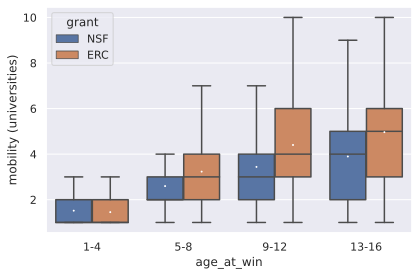

In [29]:
df_temp=pd.concat([df_temp2,df_temp3])
df_temp=df_temp[df_temp['age_at_win']!=0]
df_temp=df_temp[df_temp['mobility']>0]
# df_temp=df_temp[df_temp['mobility']<30]
MAX_AGE=16
df_temp=df_temp[df_temp['age_at_win']<=MAX_AGE]
la=0;gap=4;range_=10;
for x in range(range_):
    dict_={x:str(int(la+1))+'-'+str(int(la+gap)) for x in range(la+1,la+gap+1)};df_temp['age_at_win']=df_temp['age_at_win'].replace(dict_);la=la+gap;
    
sns.set(font_scale = 1.5)
sns.set(rc={'figure.figsize':(6,4)})
ax_=sns.boxplot(data=df_temp, x='age_at_win', y='mobility',hue='grant',showfliers=False,showmeans=True,meanprops={"marker":"o","markerfacecolor":"white","markeredgecolor":"white","markersize":"1"})
# ax_=sns.violinplot(data=df_temp, x='age_at_win', y='mobility',hue='grant',showfliers=False)
ax_.set_ylabel('mobility (universities)')
plt.tight_layout()

with open(path_data+'fig_natphysics_c.pkl', 'wb') as f:
    pickle.dump(df_temp, f)    

## Panel d

In [30]:
percent_collabs_from_country_D={'NSF':{},'ERC':{}};
# list_top_countries_D=['US','AR', 'AU', 'BR', 'CA', 'CH', 'CL', 'CN', 'CO', 'GB', 'GE', 'IL', 'IN', 'JP', 'KR', 'MX', 'NO', 'PK', 'RS', 'RU', 'SG', 'TR', 'TW', 'ZA'] 
list_top_countries_D=['US','AR', 'AU', 'BR', 'CA', 'CH', 'CL', 'CN', 'CO', 'GB', 'GE', 'IN', 'JP', 'KR', 'MX', 'PK', 'RS', 'RU', 'SG', 'TR', 'TW', 'ZA'] 
df_temp1=dfnsf[dfnsf['before_after']==-5]
df_temp2=dferc[dferc['before_after']==-5]

for country in list_top_countries_D:
    percent_collabs_from_country_D['NSF'][country]=np.nanmean((df_temp1['n_'+country]-(df_temp1['country_awardee']==country).astype('int'))/df_temp1['identified_countries']*100)
    percent_collabs_from_country_D['ERC'][country]=np.nanmean((df_temp2['n_'+country]-(df_temp2['country_awardee']==country).astype('int'))/df_temp2['identified_countries']*100)


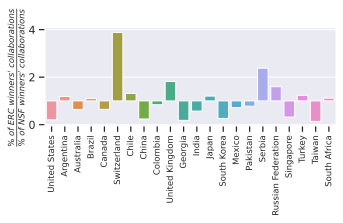

In [77]:
A={x:percent_collabs_from_country_D['ERC'][x]/percent_collabs_from_country_D['NSF'][x] for x in percent_collabs_from_country_D['ERC'].keys()}

df_=pd.DataFrame()
row_=0
award='ERC'
df_=pd.concat([df_, pd.DataFrame(list(A.values()))])
rows_=pd.DataFrame(list(A.values())).shape[0]
df_['countries']=[code_to_country[a] for a in list(percent_collabs_from_country_D[award].keys())]
# list(percent_collabs_from_country_D[award].keys())
xx=[code_to_country[a] for a in list(percent_collabs_from_country_D[award].keys())]
df_.columns=['% collabs','country']
sns.set(font_scale = 1.5)
sns.set(rc={'figure.figsize':(5,2)})
palette=sns.color_palette("mako",len(list(A.values())))
fig = plt.figure(figsize=(5, 3));
ax_=sns.barplot(x=df_["country"], y=df_['% collabs']-1,bottom=1)
ylab_=r"$\frac{\%\ of\ ERC\ winners'\ collaborations}{\%\ of\ NSF\ winners'\ collaborations}$"
simpleaxis(ax_,xlab_,ylab_)
# ax_.spines['bottom'].set_visible(False)
# ax_.set_yscale('log')
def set_axis_style(ax, labels,rot_):
    ax.xaxis.set_tick_params(direction='out')
#     ax.yaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(0, len(labels) ))
    ax.set_xticklabels(labels,rotation=rot_,fontsize=ff_smaller)
#     ax.set_xlim(-.5, len(labels) + 0.75)
xx=[code_to_country[k] for k in list_top_countries_D]
set_axis_style(ax_, xx,90)

plt.tight_layout()
# plt.savefig(path_codes+'figs/supp_fig2_ratio%_NSF_collab_countries.svg',dpi=300, bbox_inches = "tight")
# plt.savefig(path_codes+'figs/supp_fig2_ratio%_NSF_collab_countries.png',dpi=300, bbox_inches = "tight")
with open(path_data+'fig_natphysics_SI_ratio_ERC_NSF_non_eu_top_countries.pkl', 'wb') as f:
    pickle.dump(df_, f)    

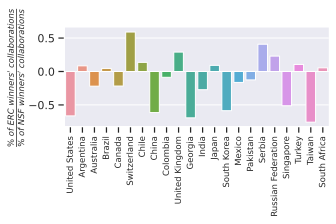

In [32]:
A={x:(percent_collabs_from_country_D['ERC'][x]-percent_collabs_from_country_D['NSF'][x])/(percent_collabs_from_country_D['ERC'][x]+percent_collabs_from_country_D['NSF'][x]) for x in percent_collabs_from_country_D['ERC'].keys()}

df_=pd.DataFrame()
row_=0
award='ERC'
df_=pd.concat([df_, pd.DataFrame(list(A.values()))])
rows_=pd.DataFrame(list(A.values())).shape[0]
df_['countries']=[code_to_country[a] for a in list(percent_collabs_from_country_D[award].keys())]
# list(percent_collabs_from_country_D[award].keys())
xx=[code_to_country[a] for a in list(percent_collabs_from_country_D[award].keys())]
df_.columns=['% collabs','country']
sns.set(font_scale = 1.5)
sns.set(rc={'figure.figsize':(5,2)})
palette=sns.color_palette("mako",len(list(A.values())))
fig = plt.figure(figsize=(5, 3));
ax_=sns.barplot(x=df_["country"], y=df_['% collabs'])
ylab_=r"$\frac{\%\ of\ ERC\ winners'\ collaborations}{\%\ of\ NSF\ winners'\ collaborations}$"
simpleaxis(ax_,xlab_,ylab_)
# ax_.spines['bottom'].set_visible(False)
# ax_.set_yscale('log')
def set_axis_style(ax, labels,rot_):
    ax.xaxis.set_tick_params(direction='out')
#     ax.yaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(0, len(labels) ))
    ax.set_xticklabels(labels,rotation=rot_,fontsize=ff_smaller)
#     ax.set_xlim(-.5, len(labels) + 0.75)
xx=[code_to_country[k] for k in list_top_countries_D]
set_axis_style(ax_, xx,90)

plt.tight_layout()
# plt.savefig(path_codes+'figs/supp_fig2_ratio%_NSF_collab_countries.svg',dpi=300, bbox_inches = "tight")
# plt.savefig(path_codes+'figs/supp_fig2_ratio%_NSF_collab_countries.png',dpi=300, bbox_inches = "tight")
with open(path_data+'fig_natphysics_d_v2.pkl', 'wb') as f:
    pickle.dump(df_, f)    

In [99]:
print((percent_collabs_from_country_D['ERC']['GB'])/percent_collabs_from_country_D['NSF']['GB'])


1.818273593596636


## Panel e

In [33]:
list_top_countries=eu_codes_only.copy()

percent_collabs_from_country={'NSF':{},'ERC':{}};
df_temp1=dfnsf[dfnsf['before_after']==-5]
df_temp2=dferc[dferc['before_after']==-5]

for country in list_top_countries:
    percent_collabs_from_country['NSF'][country]=np.nanmean((df_temp1['n_'+country]-(df_temp1['country_awardee']==country).astype('int'))/df_temp1['identified_countries']*100)
    percent_collabs_from_country['ERC'][country]=np.nanmean((df_temp2['n_'+country]-(df_temp2['country_awardee']==country).astype('int'))/df_temp2['identified_countries']*100)


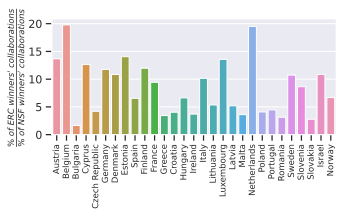

In [78]:
A={x:percent_collabs_from_country['ERC'][x]/percent_collabs_from_country['NSF'][x] for x in percent_collabs_from_country['ERC'].keys()}

df_=pd.DataFrame()
row_=0

df_=pd.concat([df_, pd.DataFrame(list(A.values()))])
rows_=pd.DataFrame(list(A.values())).shape[0]
df_['countries']=list(percent_collabs_from_country[award].keys())
df_['countries']=[code_to_country[a] for a in list(percent_collabs_from_country[award].keys())]

xx=[code_to_country[a] for a in list(percent_collabs_from_country[award].keys())]
df_.columns=['% collabs','country']
sns.set(font_scale = 1.5)
sns.set(rc={'figure.figsize':(5,2)})

# palette=sns.color_palette("mako",len(list(A.values())))

fig = plt.figure(figsize=(5, 3));
# ax_=sns.barplot(x=df_["country"], y=df_['% collabs']-1,bottom=1,palette=palette)
ax_=sns.barplot(x=df_["country"], y=df_['% collabs'])
ylab_=r"$\frac{\%\ of\ ERC\ winners'\ collaborations}{\%\ of\ NSF\ winners'\ collaborations}$"
simpleaxis(ax_,xlab_,ylab_)
# ax_.spines['bottom'].set_visible(False)
# ax_.set_yscale('log')
def set_axis_style(ax, labels,rot_):
    ax.xaxis.set_tick_params(direction='out')
#     ax.yaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(0, len(labels) ))
    ax.set_xticklabels(labels,rotation=rot_,fontsize=ff_smaller)
#     ax.set_xlim(-.5, len(labels) + 0.75)
xx=[code_to_country[k] for k in list_top_countries]
set_axis_style(ax_, xx,90)

plt.tight_layout()
# plt.savefig(path_codes+'figs/supp_fig2_ratio%_NSF_collab_countries.svg',dpi=300, bbox_inches = "tight")
# plt.savefig(path_codes+'figs/supp_fig2_ratio%_NSF_collab_countries.png',dpi=300, bbox_inches = "tight")
with open(path_data+'fig_natphysics_SI_ratio_ERC_NSF_eu_countries.pkl', 'wb') as f:
    pickle.dump(df_, f)    

In [100]:
np.mean(list(A.values()))

# B={x:(percent_collabs_from_country['ERC'][x]-percent_collabs_from_country['NSF'][x])/percent_collabs_from_country['NSF'][x]*100 for x in percent_collabs_from_country['ERC'].keys()}
# np.mean(list(B.values()))


8.383264949738766

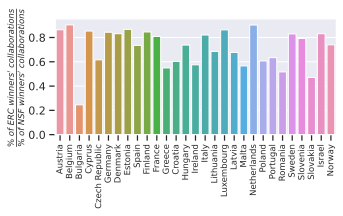

In [35]:
A={x:(percent_collabs_from_country['ERC'][x]-percent_collabs_from_country['NSF'][x])/(percent_collabs_from_country['ERC'][x]+percent_collabs_from_country['NSF'][x]) for x in percent_collabs_from_country['ERC'].keys()}

df_=pd.DataFrame()
row_=0

df_=pd.concat([df_, pd.DataFrame(list(A.values()))])
rows_=pd.DataFrame(list(A.values())).shape[0]
df_['countries']=list(percent_collabs_from_country[award].keys())
df_['countries']=[code_to_country[a] for a in list(percent_collabs_from_country[award].keys())]

xx=[code_to_country[a] for a in list(percent_collabs_from_country[award].keys())]
df_.columns=['% collabs','country']
sns.set(font_scale = 1.5)
sns.set(rc={'figure.figsize':(5,2)})

# palette=sns.color_palette("mako",len(list(A.values())))

fig = plt.figure(figsize=(5, 3));
# ax_=sns.barplot(x=df_["country"], y=df_['% collabs']-1,bottom=1,palette=palette)
ax_=sns.barplot(x=df_["country"], y=df_['% collabs'])
ylab_=r"$\frac{\%\ of\ ERC\ winners'\ collaborations}{\%\ of\ NSF\ winners'\ collaborations}$"
simpleaxis(ax_,xlab_,ylab_)
# ax_.spines['bottom'].set_visible(False)
# ax_.set_yscale('log')
def set_axis_style(ax, labels,rot_):
    ax.xaxis.set_tick_params(direction='out')
#     ax.yaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(0, len(labels) ))
    ax.set_xticklabels(labels,rotation=rot_,fontsize=ff_smaller)
#     ax.set_xlim(-.5, len(labels) + 0.75)
xx=[code_to_country[k] for k in list_top_countries]
set_axis_style(ax_, xx,90)

plt.tight_layout()
# plt.savefig(path_codes+'figs/supp_fig2_ratio%_NSF_collab_countries.svg',dpi=300, bbox_inches = "tight")
# plt.savefig(path_codes+'figs/supp_fig2_ratio%_NSF_collab_countries.png',dpi=300, bbox_inches = "tight")
with open(path_data+'fig_natphysics_e_v2.pkl', 'wb') as f:
    pickle.dump(df_, f)    

## Panel f

### Disciplinewise assignment to scientists- erc and nsf

In [236]:

it=0
dict_NSF_disciplines_to_sci={}
for sci in dict_counts_NSF.keys():
    it=it+1
    print(it/len(dict_counts_NSF.keys()),end='\r')
    if (dict_counts_NSF[sci] is not None) and (dict_counts_NSF[sci] !="NA"):
        if len(dict_counts_NSF[sci]['x_concepts'])>0:
            for it_concept in range(len(dict_counts_NSF[sci]['x_concepts'])):
                if (dict_counts_NSF[sci]['x_concepts'][it_concept]['level']==0) and (dict_counts_NSF[sci]['x_concepts'][it_concept]['score']>=70):
                    dis__=dict_counts_NSF[sci]['x_concepts'][it_concept]['display_name']  
                    if dis__ in dict_NSF_disciplines_to_sci.keys():
                        dict_NSF_disciplines_to_sci[dis__].append(sci)
                    else:
                        dict_NSF_disciplines_to_sci[dis__]=[sci]



In [237]:

it=0
dict_ERC_disciplines_to_sci={}
for sci in dict_counts_ERC.keys():
    it=it+1
    print(it/len(dict_counts_ERC.keys()),end='\r')
    if (dict_counts_ERC[sci] is not None) and (dict_counts_ERC[sci] !="NA"):
        if len(dict_counts_ERC[sci]['x_concepts'])>0:
            for it_concept in range(len(dict_counts_ERC[sci]['x_concepts'])):
                if (dict_counts_ERC[sci]['x_concepts'][it_concept]['level']==0) and (dict_counts_ERC[sci]['x_concepts'][it_concept]['score']>=70):
                    dis__=dict_counts_ERC[sci]['x_concepts'][it_concept]['display_name']  
                    if dis__ in dict_ERC_disciplines_to_sci.keys():
                        dict_ERC_disciplines_to_sci[dis__].append(sci)
                    else:
                        dict_ERC_disciplines_to_sci[dis__]=[sci]


In [238]:

it=0
dict_NSF_disciplines_to_sci={}
for sci in dict_counts_NSF.keys():
    it=it+1
    print(it/len(dict_counts_NSF.keys()),end='\r')
    if (dict_counts_NSF[sci] is not None) and (dict_counts_NSF[sci] !="NA"):
        if len(dict_counts_NSF[sci]['x_concepts'])>0:
            for it_concept in range(len(dict_counts_NSF[sci]['x_concepts'])):
                if (dict_counts_NSF[sci]['x_concepts'][it_concept]['level']==0) and (dict_counts_NSF[sci]['x_concepts'][it_concept]['score']>=70):
                    dis__=dict_counts_NSF[sci]['x_concepts'][it_concept]['display_name']  
                    if dis__ in dict_NSF_disciplines_to_sci.keys():
                        dict_NSF_disciplines_to_sci[dis__].append(sci)
                    else:
                        dict_NSF_disciplines_to_sci[dis__]=[sci]

                        

dict_disci_count={}
dict_map_sci_dis_NSF={}
dict_map_sci_dis_ERC={}
for dis in dict_NSF_disciplines_to_sci.keys():
    dict_map_sci_dis_NSF[dis]={}
    for sci in dict_NSF_disciplines_to_sci[dis]:
        dict_map_sci_dis_NSF[dis][sci]=1
    dict_map_sci_dis_ERC[dis]={}
    for sci in dict_ERC_disciplines_to_sci[dis]:
        dict_map_sci_dis_ERC[dis][sci]=1
    dict_disci_count[dis]=len(dict_NSF_disciplines_to_sci[dis])
    
x=Counter(dict_disci_count).most_common()
print(x)
top20disciplines=[y[0] for y in x]
top20disciplines_counts=[y[1] for y in x]


# top20disciplines=list(top_dis.iloc[0:20].index)

# top20disciplines_counts=list(top_dis.iloc[0:20,1])

[('Biology', 29755), ('Physics', 24794), ('Chemistry', 20832), ('Computer science', 19144), ('Engineering', 13918), ('Medicine', 11818), ('Geology', 10766), ('Mathematics', 10682), ('Materials science', 10350), ('Psychology', 8044), ('Geography', 6826), ('Political science', 4274), ('Economics', 4102), ('Sociology', 3697), ('Environmental science', 3662), ('Philosophy', 2503), ('History', 1983), ('Business', 1453), ('Art', 730)]


In [239]:
dfnsfbefore=dfnsf[dfnsf['before_after']==-5]
dfercbefore=dferc[dferc['before_after']==-5]


dict_df_NSF_dis={}
dict_df_ERC_dis={}
dict_df_NSF_dis_by_sci={}
dict_df_ERC_dis_by_sci={}
pd.options.mode.chained_assignment = None  # default='warn'

it=0
for dis in top20disciplines:
    it+=1
    print(it,'---',dis,end='\r')
    dfnsfbefore['discipline']=dfnsfbefore['scientist'].map(dict_map_sci_dis_NSF[dis])
    dfercbefore['discipline']=dfercbefore['scientist'].map(dict_map_sci_dis_ERC[dis])
    dict_df_NSF_dis[dis]=dfnsfbefore[dfnsfbefore['discipline']==1]
    dict_df_ERC_dis[dis]=dfercbefore[dfercbefore['discipline']==1]
# for dis in top_disciplines_sci:
#     it+=1
#     print(it,'---',dis,end='\r')
#     dict_df_NSF_dis_by_sci[dis]=df_NSF_top_x[df_NSF_top_x['discipline']==dis]
#     dict_df_ERC_dis_by_sci[dis]=df_ERC_std[df_ERC_std['discipline']==dis]
        

In [240]:

erc_static_dis={}
nsf_static_dis={}
erc_static_by_sci_dis={}
nsf_static_by_sci_dis={}
it=0
for dis in top20disciplines:
    print(it,'---',dis,end='\r')
    it_p=0;it+=1



    x_missing=1
    df=dict_df_NSF_dis[dis][dict_df_NSF_dis[dis]['identified_countries']>0]
    df=df[df['team_size']-df['identified_countries']<=x_missing]
    df['frac_cross']=np.divide(np.array(df['n_EU']),np.array(df['identified_countries']))
    nsf_static_by_sci_dis[dis]=(np.mean(df.groupby('scientist').mean()['frac_cross']))
    nsf_static_values_dis=np.divide(np.array(df['n_EU']),np.array(df['identified_countries']))
    nsf_static_dis[dis]=np.mean(nsf_static_values_dis)

    df_=dict_df_ERC_dis[dis]
    df_=df_[df_['identified_countries']>0]
    df_=df_[df_['team_size']-df_['identified_countries']<=x_missing]
    df_['frac_cross']=np.divide(np.array(df_['n_US']),np.array(df_['identified_countries']))
    erc_static_by_sci_dis[dis]=(np.mean(df_.groupby('scientist').mean()['frac_cross']))
    erc_static_values_dis=np.divide(np.array(df_['n_US']),np.array(df_['identified_countries']))
    erc_static_dis[dis]=np.mean(erc_static_values_dis)

['Biology', 'Physics', 'Chemistry', 'Computer science', 'Engineering', 'Medicine', 'Geology', 'Mathematics', 'Materials science', 'Psychology', 'Geography', 'Political science', 'Economics', 'Sociology', 'Environmental science']


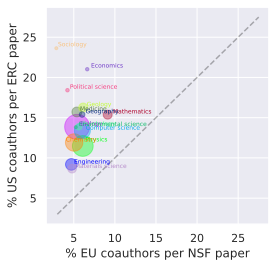

In [241]:
from distinctipy import distinctipy

# ______________________________________________________

it_p=0;it_p+=1;
alpha=.8;width=.4;
# ff=13

# ______________________________________________________
fig = plt.figure(0,figsize=(4, 4));
ax = fig.add_subplot(1, 1, 1);
x_leg=1;y_leg=.5;
ndis=15
colors_=distinctipy.get_colors(ndis+1)

xx={x_:1.07 for x_ in top20disciplines[0:ndis]};
xx={x_:1.07 for x_ in top20disciplines[0:ndis]};
yy={x_:1.01 for x_ in top20disciplines[0:ndis]}
# yy['Biology']=.9;xx['Biology']=.9
# yy['Computer science']=.85;xx['Computer science']=.1
# yy['Psychology']=.98;xx['Psychology']=1.02
yy['Physics']=1.05;xx['Physics']=1.05
# yy['Chemistry']=;
xx['Chemistry']=.8
# yy['Engineering']=1.01;xx['Engineering']=1
# yy['Materials science']=.95;xx['Materials science']=1.1
# yy['Political science']=.95;xx['Political science']=1
# yy['Geography']=.99;xx['Geography']=1.05
# yy['Geology']=.99;xx['Geology']=1.05

sign=1
for dis,it in zip(top20disciplines[0:ndis],range(0,ndis)):
    size_=top20disciplines_counts[it]/max(top20disciplines_counts)
#     size_=size_**0.5
    ax.plot(100*nsf_static_dis[dis],100*erc_static_dis[dis],'o',ms=25*size_,label=dis,alpha=.4,color=colors_[it])
    ax.annotate(dis, [100*nsf_static_dis[dis]*xx[dis],100*erc_static_dis[dis]*yy[dis]],fontsize=ff-6,color=colors_[it])

ax.plot([3,100*max(erc_static_dis.values())-4],[3,100*max(erc_static_dis.values())-4],'--',color='black',label=r'balanced',alpha=.3)
# ax.set_facecolor('azure')

xx=1.5;yy=11
# ax.set_xticks([0,5,10]);
# ax.set_yticks([0,5,10]);
# ax.set_xlim([xx,yy]);
# ax.set_ylim([xx,yy]);
ax.set_xlabel('% EU coauthors per NSF paper',fontsize=ff);
ax.set_ylabel('% US coauthors per ERC paper',fontsize=ff);
# ax.legend(bbox_to_anchor=(.95,1),frameon=False,fontsize=ff*1,ncol=1);
# simpleaxis(ax)
# plt.savefig(path_codes+'figs/fig4_disciplinewise.png',dpi=300, bbox_inches = "tight")
# print(round((erc_static-nsf_static)/erc_static*100,2),'% more US collaborations by ERC winners','\n\n')
print(top20disciplines[0:ndis])
# #_________________
# print(scipy.stats.ks_2samp(erc_static_values, nsf_static_values))

In [242]:
# for dis,it in zip(top20disciplines[0:ndis],range(0,ndis)):
#     size_=top20disciplines_counts[it]/max(top20disciplines_counts)
#     size_=size_**0.5
#     100*nsf_static_dis[dis],100*erc_static_dis[dis],'o',ms=25*size_,label=dis,alpha=.2,color=colors_[it])
#     ax.annotate(dis, [100*nsf_static_dis[dis]*xx[dis],100*erc_static_dis[dis]*yy[dis]],fontsize=ff-6,color=colors_[it])


In [243]:
store_colors={dis: color for dis,color in zip(top20disciplines[0:ndis],colors_)}

In [244]:
dict_size_of_disciplines_top={x:y for x,y in zip(top20disciplines,top20disciplines_counts)}
nsf_disciplinewise={dis:100*nsf_static_dis[dis] for dis in dict_size_of_disciplines_top.keys()}
erc_disciplinewise={dis:100*erc_static_dis[dis] for dis in dict_size_of_disciplines_top.keys()}
with open(path_data+'fig_natphysics_f_dict_size_of_disciplines_top.pkl', 'wb') as f:
    pickle.dump(dict_size_of_disciplines_top, f)   
with open(path_data+'fig_natphysics_f_nsf_disciplinewise.pkl', 'wb') as f:
    pickle.dump(nsf_disciplinewise, f) 
with open(path_data+'fig_natphysics_f_erc_disciplinewise.pkl', 'wb') as f:
    pickle.dump(erc_disciplinewise, f) 
    
    


# Supplementary figures

## mobility countries

In [410]:
MAX_AGE=40
from collections import Counter

df_temp=dfs_NSF_only_awardee[dfs_NSF_only_awardee['pub_year']<=dfs_NSF_only_awardee['grant_year']]
df_temp['age_at_win']=df_temp['grant_year']-df_temp['first_pub_date']
df_temp=df_temp[df_temp['age_at_win']<=MAX_AGE]
list_countries_winners=df_temp.groupby(by=['age_at_win','scientist'])['country_awardee'].apply(list)
df_temp2=pd.DataFrame()
df_temp2['age_at_win']=[x[0] for x in list(list_countries_winners.index)]

list_countries_winners=[[y for y in x if y!=None] for x in list_countries_winners]
t=[Counter(x) for x in list_countries_winners]

# list_countries_winners=[]
# for x in t:
#     if len(x)>0:
#         list_countries_winners.append([y for y in x if x[y]>1])
#     else:
#         list_countries_winners.append(x)
list_countries_winners=[set(x) for x in list_countries_winners]
uni_mobility_before=np.array([len(x) for x in list_countries_winners])

df_temp2['mobility']=uni_mobility_before
df_temp2['grant']='NSF'



df_temp=dfs_ERC_only_awardee_NOT_UK_etc[dfs_ERC_only_awardee_NOT_UK_etc['pub_year']<=dfs_ERC_only_awardee_NOT_UK_etc['grant_year']]
df_temp['age_at_win']=df_temp['grant_year']-df_temp['first_pub_date']
df_temp=df_temp[df_temp['age_at_win']<=MAX_AGE]
list_countries_winners=df_temp.groupby(by=['age_at_win','scientist'])['country_awardee'].apply(list)
df_temp3=pd.DataFrame()
df_temp3['age_at_win']=[x[0] for x in list(list_countries_winners.index)]

list_countries_winners=[[y for y in x if y!=None] for x in list_countries_winners]
t=[Counter(x) for x in list_countries_winners]

# list_countries_winners=[]
# for x in t:
#     if len(x)>0:
#         list_countries_winners.append([y for y in x if x[y]>1])
#     else:
#         list_countries_winners.append(x)
list_countries_winners=[set(x) for x in list_countries_winners]
uni_mobility_before=np.array([len(x) for x in list_countries_winners])
df_temp3['mobility']=uni_mobility_before
df_temp3['grant']='ERC'


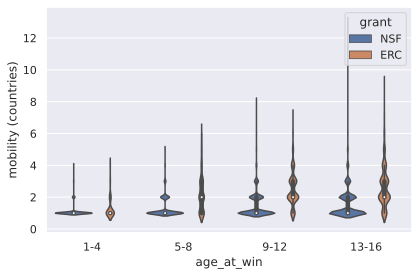

In [411]:
df_temp=pd.concat([df_temp2,df_temp3])
df_temp=df_temp[df_temp['age_at_win']!=0]
df_temp=df_temp[df_temp['mobility']>0]
# df_temp=df_temp[df_temp['mobility']<30]
MAX_AGE=16
df_temp=df_temp[df_temp['age_at_win']<=MAX_AGE]
la=0;gap=4;range_=10;
for x in range(range_):
    dict_={x:str(int(la+1))+'-'+str(int(la+gap)) for x in range(la+1,la+gap+1)};df_temp['age_at_win']=df_temp['age_at_win'].replace(dict_);la=la+gap;
    
sns.set(font_scale = 1.5)
sns.set(rc={'figure.figsize':(6,4)})
# ax_=sns.boxplot(data=df_temp, x='age_at_win', y='mobility',hue='grant',showfliers=False,showmeans=True,meanprops={"marker":"o","markerfacecolor":"white","markeredgecolor":"white","markersize":"1"})
ax_=sns.violinplot(data=df_temp, x='age_at_win', y='mobility',hue='grant',showfliers=False)
ax_.set_ylabel('mobility (countries)')
plt.tight_layout()

with open(path_data+'fig_natphysics_SI_mobility_countries.pkl', 'wb') as f:
    pickle.dump(df_temp, f)    

#### EU single state

In [431]:

MAX_AGE=40
from collections import Counter

df_temp=dfs_NSF_only_awardee[dfs_NSF_only_awardee['pub_year']<=dfs_NSF_only_awardee['grant_year']]
df_temp['country_awardee']=df_temp['country_awardee'].replace(dict_country_in_EU)
df_temp['age_at_win']=df_temp['grant_year']-df_temp['first_pub_date']
df_temp=df_temp[df_temp['age_at_win']<=MAX_AGE]
list_countries_winners=df_temp.groupby(by=['age_at_win','scientist'])['country_awardee'].apply(list)
df_temp2=pd.DataFrame()
df_temp2['age_at_win']=[x[0] for x in list(list_countries_winners.index)]

list_countries_winners=[[y for y in x if y!=None] for x in list_countries_winners]
t=[Counter(x) for x in list_countries_winners]

# list_countries_winners=[]
# for x in t:
#     if len(x)>0:
#         list_countries_winners.append([y for y in x if x[y]>1])
#     else:
#         list_countries_winners.append(x)
list_countries_winners=[set(x) for x in list_countries_winners]
uni_mobility_before=np.array([len(x) for x in list_countries_winners])

df_temp2['mobility']=uni_mobility_before
df_temp2['grant']='NSF'



df_temp=dfs_ERC_only_awardee_NOT_UK_etc[dfs_ERC_only_awardee_NOT_UK_etc['pub_year']<=dfs_ERC_only_awardee_NOT_UK_etc['grant_year']]
df_temp['country_awardee']=df_temp['country_awardee'].replace(dict_country_in_EU)
df_temp['age_at_win']=df_temp['grant_year']-df_temp['first_pub_date']
df_temp=df_temp[df_temp['age_at_win']<=MAX_AGE]
list_countries_winners=df_temp.groupby(by=['age_at_win','scientist'])['country_awardee'].apply(list)
df_temp3=pd.DataFrame()
df_temp3['age_at_win']=[x[0] for x in list(list_countries_winners.index)]

list_countries_winners=[[y for y in x if y!=None] for x in list_countries_winners]
t=[Counter(x) for x in list_countries_winners]

# list_countries_winners=[]
# for x in t:
#     if len(x)>0:
#         list_countries_winners.append([y for y in x if x[y]>1])
#     else:
#         list_countries_winners.append(x)
list_countries_winners=[set(x) for x in list_countries_winners]
uni_mobility_before=np.array([len(x) for x in list_countries_winners])
df_temp3['mobility']=uni_mobility_before
df_temp3['grant']='ERC'


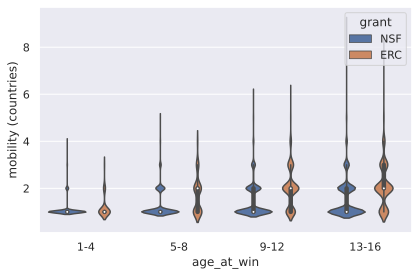

In [432]:
df_temp=pd.concat([df_temp2,df_temp3])
df_temp=df_temp[df_temp['age_at_win']!=0]
df_temp=df_temp[df_temp['mobility']>0]
# df_temp=df_temp[df_temp['mobility']<30]
MAX_AGE=16
df_temp=df_temp[df_temp['age_at_win']<=MAX_AGE]
la=0;gap=4;range_=10;
for x in range(range_):
    dict_={x:str(int(la+1))+'-'+str(int(la+gap)) for x in range(la+1,la+gap+1)};df_temp['age_at_win']=df_temp['age_at_win'].replace(dict_);la=la+gap;
    
sns.set(font_scale = 1.5)
sns.set(rc={'figure.figsize':(6,4)})
# ax_=sns.boxplot(data=df_temp, x='age_at_win', y='mobility',hue='grant',showfliers=False,showmeans=True,meanprops={"marker":"o","markerfacecolor":"white","markeredgecolor":"white","markersize":"1"})
ax_=sns.violinplot(data=df_temp, x='age_at_win', y='mobility',hue='grant',showfliers=False)
ax_.set_ylabel('mobility (countries)')
plt.tight_layout()

with open(path_data+'fig_natphysics_SI_mobility_countries_EU_single.pkl', 'wb') as f:
    pickle.dump(df_temp, f)    

## top NSF by money/ citations filtered to match ERC winner count per year

In [280]:
dfnsf_year={}
NSF_top_X=[]
for year in range(2008,2022):
    dfnsf_year[year]=dfnsf[dfnsf['grant_year']==year]
    X=dfnsf_year[year].groupby(['scientist']).first()['citations_before_winning']
    df__=pd.DataFrame(list(X.values),list(X.index))
    df__=df__.sort_values(0,ascending=False)
    NSF_top_X=NSF_top_X+list(df__.index[0:erc_award_counts[year]])
#     print(df__.shape,erc_award_counts[year])
dict_sci_in={sci:1 for sci in NSF_top_X}
dfnsf['sci_in_citations']=dfnsf['scientist'].map(dict_sci_in)
#-------------------------------------------------------------------------------
dfnsf_year={}
NSF_top_X=[]
for year in range(2008,2022):
    dfnsf_year[year]=dfnsf[dfnsf['grant_year']==year]
    X=dfnsf_year[year].groupby(['scientist']).first()['AwardAmount']
    df__=pd.DataFrame(list(X.values),list(X.index))
    df__=df__.sort_values(0,ascending=False)
    NSF_top_X=NSF_top_X+list(df__.index[0:erc_award_counts[year]])
#     print(df__.shape,erc_award_counts[year])
dict_sci_in={sci:1 for sci in NSF_top_X}
dfnsf['sci_in_money']=dfnsf['scientist'].map(dict_sci_in)

In [282]:
df_nsf_top_x_money=dfnsf[dfnsf['sci_in_money']==1]
df_nsf_top_x_citations=dfnsf[dfnsf['sci_in_citations']==1]


#### Fig 

In [425]:
x_missing=1

In [426]:
x=(dferc['pub_year']-dferc['grant_year'])
dferc['before_after']=5*((x>=0) &(x<5)) -5*((x>-5) &(x<0))+ 0*((x>5) &(x<-5)) 
df=dferc[dferc['team_size']-dferc['identified_countries']<=x_missing]
df['frac_US']=df['n_US']/df['identified_countries']
res_=df.groupby(['scientist','before_after']).mean()
in_erc=[];out_erc=[]
for sci,in_grant in res_.index:
    if sum([x in res_.loc[sci,].index for x in [-5,5]])==2:
        if in_grant==5:
            in_erc.append(res_.loc[sci,in_grant]['frac_US'])
        elif in_grant==-5:
            out_erc.append(res_.loc[sci,in_grant]['frac_US'])
            

<ipython-input-219-a03b03b307f4>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_=df_.append(pd.DataFrame(data_))
<ipython-input-219-a03b03b307f4>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_=df_.append(pd.DataFrame(data_))
<ipython-input-219-a03b03b307f4>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_=df_.append(pd.DataFrame(data_))
<ipython-input-219-a03b03b307f4>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_=df_.append(pd.DataFrame(data_))


before:  frac_cross    141.967417
dtype: float64
after:  frac_cross    78.069284
dtype: float64


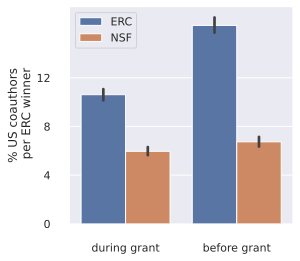

In [459]:
x=(df_nsf_top_x_money['pub_year']-df_nsf_top_x_money['grant_year'])
df_nsf_top_x_money['before_after']=5*((x>=0) &(x<5)) -5*((x>-5) &(x<0))+ 0*((x>5) &(x<-5)) 
df=df_nsf_top_x_money[df_nsf_top_x_money['team_size']-df_nsf_top_x_money['identified_countries']<=x_missing]
df['frac_EU']=df['n_EU']/df['identified_countries']
res_=df.groupby(['scientist','before_after']).mean()
in_nsf=[];out_nsf=[]
for sci,in_grant in res_.index:
    if sum([x in res_.loc[sci,].index for x in [-5,5]])==2:
        if in_grant==5:
            in_nsf.append(res_.loc[sci,in_grant]['frac_EU'])
        elif in_grant==-5:
            out_nsf.append(res_.loc[sci,in_grant]['frac_EU'])
df_=plot_before_after(in_erc,out_erc,in_nsf,out_nsf)
temp=df_.groupby(by=['x','']).mean()
print('before: ',(temp.iloc[0]-temp.iloc[1])/temp.iloc[1]*100)
print('after: ',(temp.iloc[2]-temp.iloc[3])/temp.iloc[3]*100)

with open(path_data+'fig_natphysics_SI_filter_by_money.pkl', 'wb') as f:
    pickle.dump(df_, f)    

<ipython-input-219-a03b03b307f4>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_=df_.append(pd.DataFrame(data_))
<ipython-input-219-a03b03b307f4>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_=df_.append(pd.DataFrame(data_))
<ipython-input-219-a03b03b307f4>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_=df_.append(pd.DataFrame(data_))
<ipython-input-219-a03b03b307f4>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_=df_.append(pd.DataFrame(data_))


before:  frac_cross    99.739752
dtype: float64
after:  frac_cross    35.262417
dtype: float64


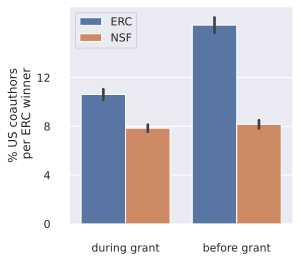

In [460]:
x=(df_nsf_top_x_citations['pub_year']-df_nsf_top_x_citations['grant_year'])
df_nsf_top_x_citations['before_after']=5*((x>=0) &(x<5)) -5*((x>-5) &(x<0))+ 0*((x>5) &(x<-5)) 
df=df_nsf_top_x_citations[df_nsf_top_x_citations['team_size']-df_nsf_top_x_citations['identified_countries']<=x_missing]
df['frac_EU']=df['n_EU']/df['identified_countries']
res_=df.groupby(['scientist','before_after']).mean()
in_nsf=[];out_nsf=[]
for sci,in_grant in res_.index:
    if sum([x in res_.loc[sci,].index for x in [-5,5]])==2:
        if in_grant==5:
            in_nsf.append(res_.loc[sci,in_grant]['frac_EU'])
        elif in_grant==-5:
            out_nsf.append(res_.loc[sci,in_grant]['frac_EU'])
            
df_=plot_before_after(in_erc,out_erc,in_nsf,out_nsf)
temp=df_.groupby(by=['x','']).mean()
print('before: ',(temp.iloc[0]-temp.iloc[1])/temp.iloc[1]*100)
print('after: ',(temp.iloc[2]-temp.iloc[3])/temp.iloc[3]*100)

with open(path_data+'fig_natphysics_SI_filter_by_citations.pkl', 'wb') as f:
    pickle.dump(df_, f)    

## levenstein distance

In [342]:

with open(path_data+'dict_uni_main(nature physics).pkl', 'rb') as f:
    dict_uni_main=pickle.load(f)   


In [343]:
dfs_ERC_frq_NOT_UK_etc['uni_awardee_name']=dfs_ERC_frq_NOT_UK_etc.uni_awardee.map(dict_uni_main)

In [365]:

list_affils=dfs_ERC_frq_NOT_UK_etc.groupby(by='scientist')['uni_awardee_name'].apply(list)
list_affils=[set(x) for x in list_affils]
list_affils=[[y for y in x if (y != None) and (str(y)!='nan')] for x in list_affils]


In [368]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
fuzz_dis=[]
for affils in list_affils:
    for i in range(len(affils)):
        for j in range(i+1,len(affils)):
            fuzz_dis.append([str(affils[i]),affils[j],fuzz.token_sort_ratio(affils[i],affils[j])])
                            

In [369]:
fuzz_dis_score=[x[2] for x in fuzz_dis]

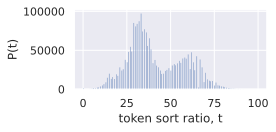

In [381]:
sns.set(font_scale = 1.5)
sns.set(rc={'figure.figsize':(4,2)})
ax_=sns.histplot(x=fuzz_dis_score)
ax_.set_xlabel('token sort ratio, t')
ax_.set_ylabel('P(t)')
plt.tight_layout()


In [385]:
fuzz.token_sort_ratio('University of Nebraska–Lincoln','University of Nebraska–Lincoln')

100

In [387]:
fuzz.token_sort_ratio('University of Nebraska–Lincoln','University of Nebraska')

85

In [393]:
fuzz.token_sort_ratio('University of Nebraska–Lincoln','University of Lic')

72

# counts of ERC awardees per EU countries

In [ ]:
A=df_ERC_scientist_award_details.groupby(by='Country').count()
dict_count_ERC_winners_per_country=A.iloc[:,0].T.to_dict()

In [424]:
with open(path_data+'dict_count_ERC_winners_per_country.pkl', 'wb') as f:
    pickle.dump(dict_count_ERC_winners_per_country, f)    

In [517]:
dict_count_ERC_winners_per_country['United Kingdom']/np.sum([x for x in dict_count_ERC_winners_per_country.values()])

0.19504256384576865

# Important numbers to report

In [41]:
X=dfs_ERC_frq_NOT_UK_etc.groupby(by='scientist').count()
print('number of ERC winners-',X.shape)


number of ERC winners- (6260, 64)


In [42]:
X=dfs_ERC_frq_NOT_UK_etc.groupby(by='scientist').count()
print('number of ERC winners-',X.shape)


number of ERC winners- (6260, 64)


In [43]:
df_temp1=dfs_ERC_frq_NOT_UK_etc.copy()
df_temp1['age_at_win']=df_temp1['grant_year']-df_temp1['first_pub_date']
df_temp1['age_at_win'].mean()

22.93595367278976

# ERC: analysis by grant type

In [46]:
print(df_ERC_scientist_award_details['starting_grant'].sum(),
      df_ERC_scientist_award_details['adv_grant'].sum(),
      df_ERC_scientist_award_details['cons_grant'].sum(),
      df_ERC_scientist_award_details['synergy_grant'].sum())      

5081 3084 2431 114


In [56]:
dict_erc_details={}
dict_sci_to_type={}
dict_dfs_erc={}
for type_ in ['starting_grant','cons_grant','adv_grant']:
    dict_erc_details[type_]=df_ERC_scientist_award_details_not_UK[df_ERC_scientist_award_details_not_UK[type_]==1]
    dict_sci_to_type[type_]=dict_erc_details[type_].set_index('scientist')['start_date_in_years'].T.to_dict()
    dfs_ERC_frq['analysis_by_grant_type']=dfs_ERC_frq['scientist'].map(dict_sci_to_type[type_])
    dict_dfs_erc[type_]=dfs_ERC_frq[dfs_ERC_frq['analysis_by_grant_type'].isna()==False]
    dict_dfs_erc[type_]['age_at_win']=dict_dfs_erc[type_]['analysis_by_grant_type']-dict_dfs_erc[type_]['first_pub_date']


## Ages of ERC grant awards:'starting_grant','cons_grant','adv_grant'

In [57]:
for type_ in ['starting_grant','cons_grant','adv_grant']:
    print(dict_dfs_erc[type_].groupby(by=['scientist']).first()['age_at_win'].mean())
    
# dfs_ERC_frq

11.769761831434137
15.693805206880509
25.685857142857127


In [52]:
dict_out={}
dict_in={}
for type_ in ['starting_grant','cons_grant','adv_grant']:
    print(type_)
    x_missing=1
    df10=dict_dfs_erc[type_][dict_dfs_erc[type_]['identified_countries']>1]
    df10['grant_year']
    x=(df10['pub_year']-df10['grant_year'])
    df10['before_after']=5*((x>=0) &(x<5)) -5*((x>-5) &(x<0))+ 0*((x>5) &(x<-5)) 
    df10=df10[df10['team_size']-df10['identified_countries']<=x_missing]
    df10['frac_US']=df10['n_US']/df10['identified_countries']
    res_=df10.groupby(['scientist','before_after']).mean()
    in_erc=[];out_erc=[]
    for sci,in_grant in res_.index:
        if sum([x in res_.loc[sci,].index for x in [-5,5]])==2:
            if in_grant==5:
                in_erc.append(res_.loc[sci,in_grant]['frac_US'])
            elif in_grant==-5:
                out_erc.append(res_.loc[sci,in_grant]['frac_US'])
    dict_out[type_]=out_erc
    dict_in[type_]=in_erc

starting_grant
cons_grant
adv_grant


starting_grant
                  frac_cross
x                           
before grant ERC    0.216004
             NSF    0.055447
during grant ERC    0.118147
             NSF    0.052785
cons_grant
                  frac_cross
x                           
before grant ERC    0.138833
             NSF    0.055447
during grant ERC    0.094052
             NSF    0.052785
adv_grant
                  frac_cross
x                           
before grant ERC    0.134884
             NSF    0.055447
during grant ERC    0.112543
             NSF    0.052785


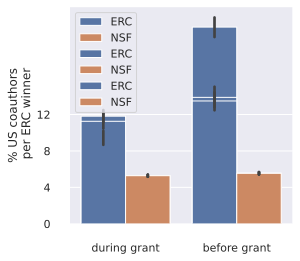

In [53]:

for type_ in ['starting_grant','cons_grant','adv_grant']:
    print(type_)
    in_erc=dict_in[type_]
    out_erc=dict_out[type_]
    df_=plot_before_after(in_erc,out_erc,in_nsf_,out_nsf_)
    temp=df_.groupby(by=['x','']).mean()
    print(temp)
#     print('before: ',(temp.iloc[0]-temp.iloc[1])/temp.iloc[1]*100)
#     print('after: ',(temp.iloc[2]-temp.iloc[3])/temp.iloc[3]*100)
